<a href="https://colab.research.google.com/github/ariel07-sw/applied-data-in-econ/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install wbgapi

In [13]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
country_codes=['PER','UMC','WLD']
indicators={
 'NY.GDP.PCAP.KD':'GDP_Per_Capita_Const',
 'SL.TLF.CACT.ZS': 'Labor_Part_Rate',
 'SL.UEM.TOTL.ZS': 'Unemployment_Rate',
 'SL.TLF.TOTL.IN': 'Labor_Force_Total',
 'NY.GDP.MKTP.KD': 'GDP_Const',
 'FP.CPI.TOTL.ZG': 'Inflation_CPI',
 'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',
 'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',
 'NE.EXP.GNFS.ZS': 'Exports_GDP',
 'NE.IMP.GNFS.ZS': 'Imports_GDP',
 'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',
 'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'
            }

In [14]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('PER', axis=1, level=0).copy()

Fetching data...


In [15]:
df_gtm

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate
Year,,,,,,,,,,,,
2000,3.757338,12.608647,11.450627,16.768374,19.627985,18.769658,8.740938e+10,3286.273085,17.626700,65.780,11421931.0,4.958
2001,1.977099,12.897106,11.717171,16.601380,18.159505,18.463022,8.794948e+10,3261.664251,16.297863,68.790,12219945.0,5.063
2002,0.193135,12.487143,11.165026,17.274808,17.968146,17.974373,9.274583e+10,3398.749914,17.268580,69.905,12684641.0,4.840
2003,2.259378,13.411521,11.518717,19.014667,17.510289,18.609943,9.660871e+10,3502.791657,17.915013,70.997,13141062.0,4.150
2004,3.662473,13.663369,11.256279,22.912234,16.855683,19.023845,1.013988e+11,3640.602999,20.744072,72.065,13588521.0,4.710
2005,1.616302,14.104742,11.444512,26.848761,17.283818,20.508556,1.077717e+11,3835.132193,23.624022,73.109,14024578.0,4.870
2006,2.002258,15.669988,10.916695,30.536636,19.650602,21.248420,1.158858e+11,4091.362686,28.938819,76.140,14840428.0,4.170
2007,1.779986,16.407468,10.455030,31.522117,22.032387,24.165997,1.257574e+11,4407.791217,29.388507,78.228,15475880.0,4.080
2008,5.785876,16.512171,10.370862,29.727630,26.178346,28.706137,1.372347e+11,4778.526422,27.199839,78.223,15688718.0,4.030


In [16]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

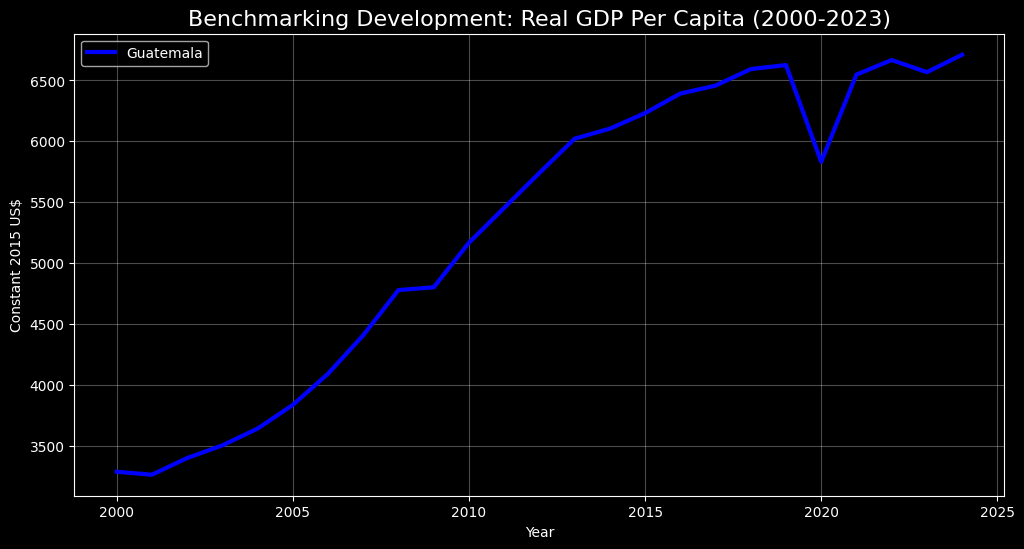

In [17]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('PER', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

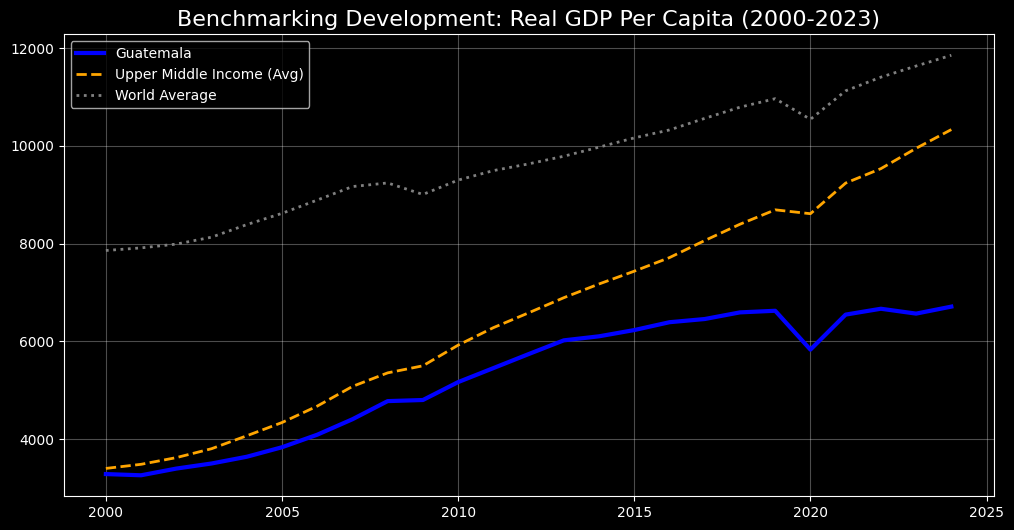

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('PER', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

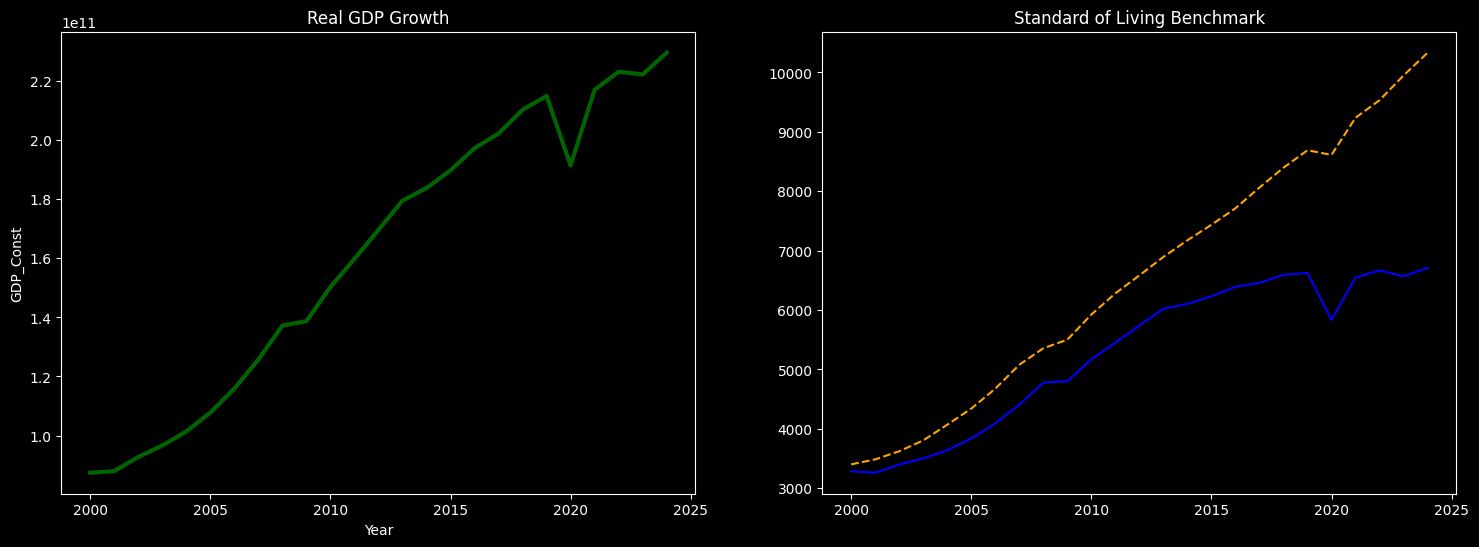

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('PER', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

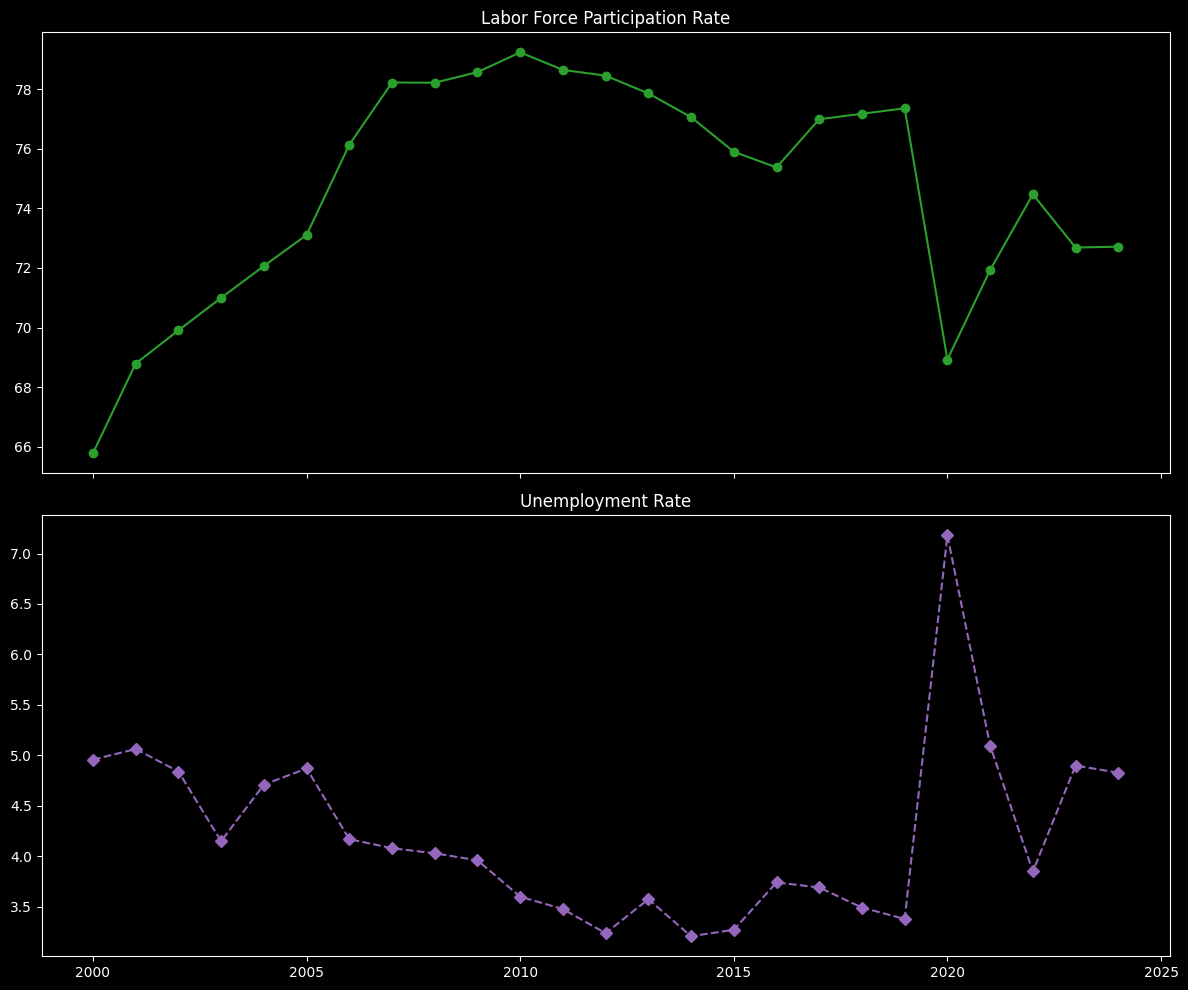

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

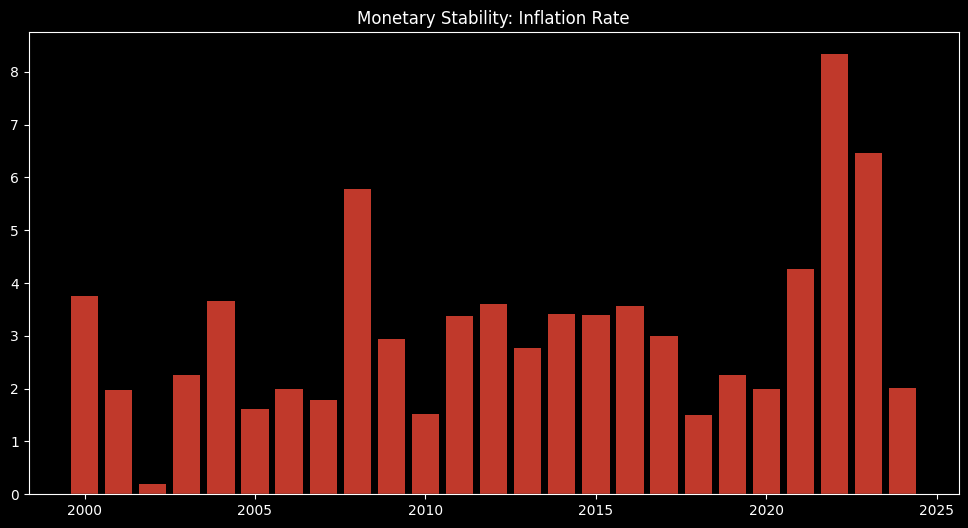

In [21]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

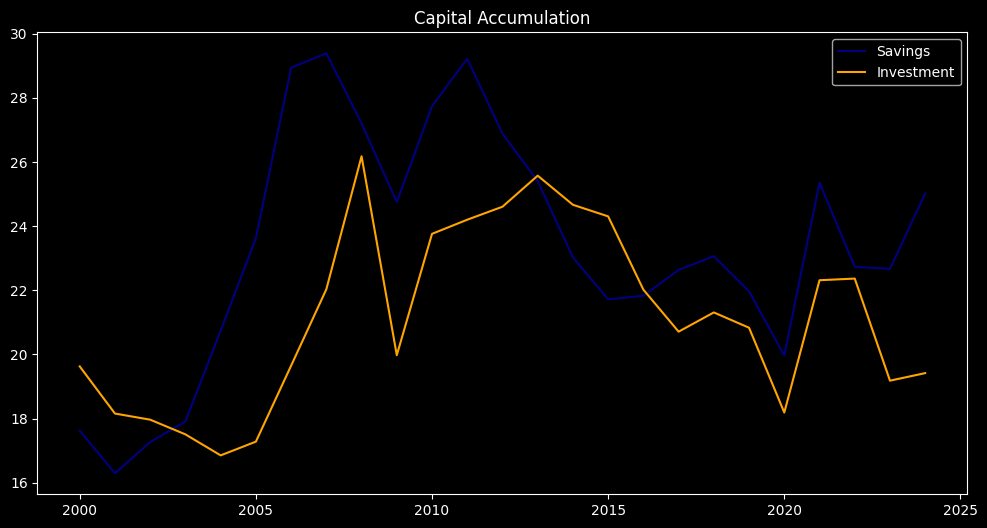

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

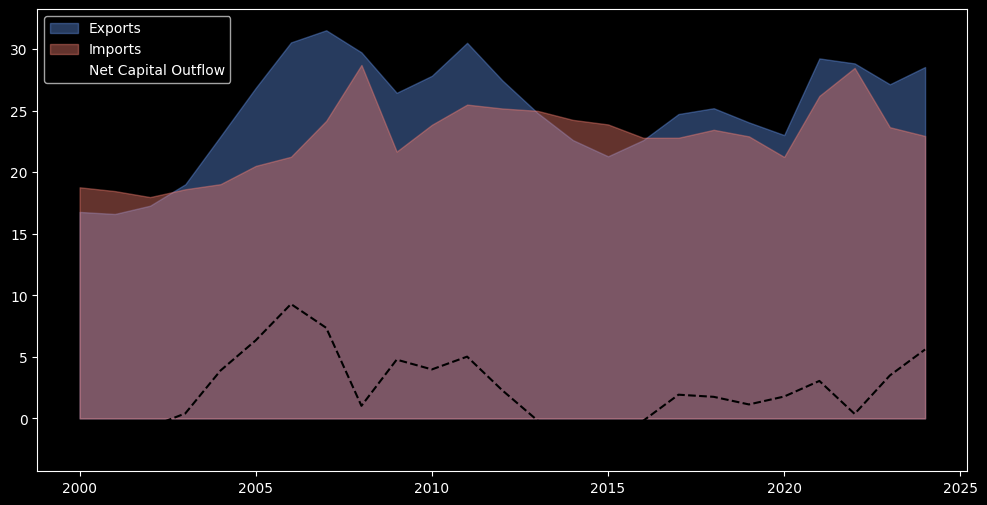

In [23]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

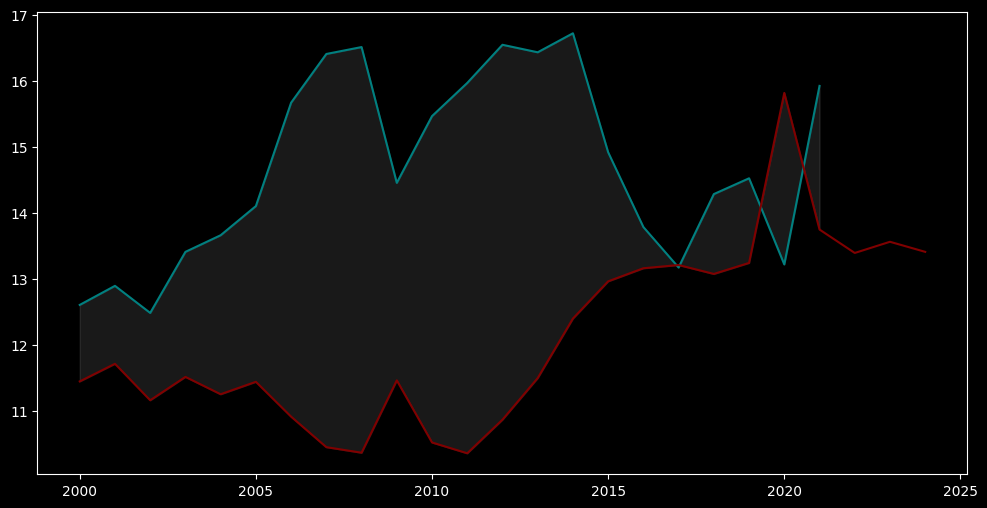

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

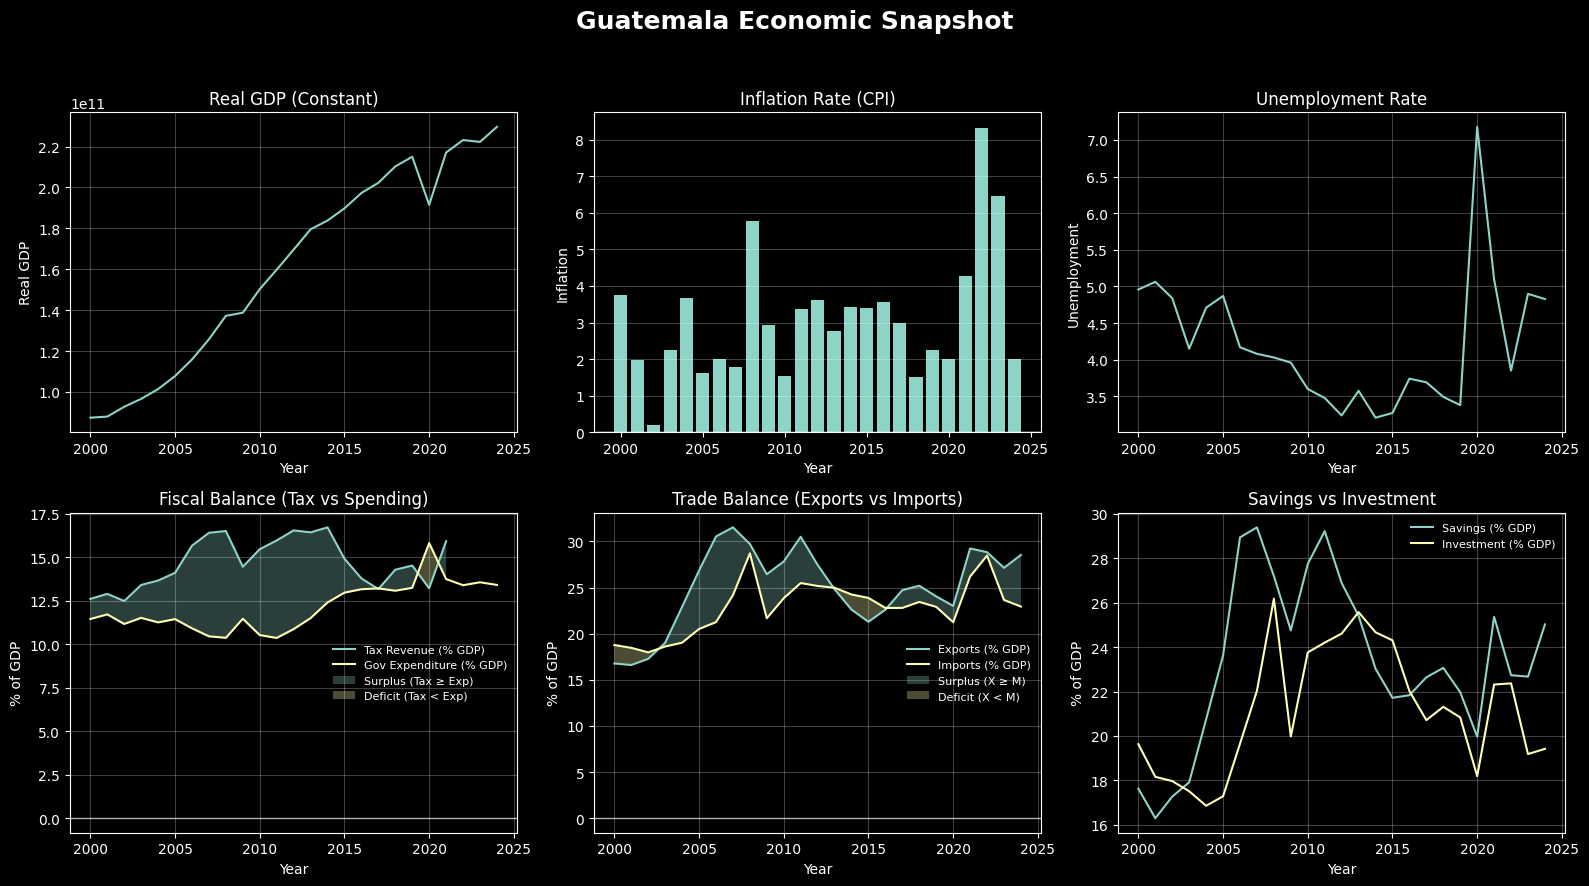

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# If you also want Seaborn styling, uncomment:
# import seaborn as sns
# sns.set_theme()

# ---------- Style ----------
plt.style.use('dark_background')

# ---------- Safety checks ----------
required_cols = [
    'GDP_Const', 'Inflation_CPI', 'Unemployment_Rate',
    'Tax_Rev_GDP', 'Gov_Exp_GDP', 'Exports_GDP', 'Imports_GDP',
    'Gross_Dom_Savings', 'Gross_Cap_Formation'
]
missing = [c for c in required_cols if c not in df_gtm.columns]
if missing:
    raise ValueError(f"df_gtm is missing columns: {missing}")

# Ensure time index is sorted (works whether index is year or datetime)
df_plot = df_gtm.sort_index().copy()

# ---------- Figure ----------
fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle('Guatemala Economic Snapshot', fontsize=18, fontweight='bold')

# ========== 1) Top Left: Real GDP (Line) ==========
ax = axes[0, 0]
ax.plot(df_plot.index, df_plot['GDP_Const'])
ax.set_title('Real GDP (Constant)', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Real GDP')
ax.grid(True, alpha=0.25)

# ========== 2) Top Middle: Inflation (Bar + 0 line) ==========
ax = axes[0, 1]
ax.bar(df_plot.index, df_plot['Inflation_CPI'])
ax.axhline(0, linewidth=1)  # horizontal 0 line
ax.set_title('Inflation Rate (CPI)', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Inflation')
ax.grid(True, axis='y', alpha=0.25)

# ========== 3) Top Right: Unemployment (Line) ==========
ax = axes[0, 2]
ax.plot(df_plot.index, df_plot['Unemployment_Rate'])
ax.set_title('Unemployment Rate', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
ax.grid(True, alpha=0.25)

# ========== 4) Bottom Left: Fiscal Balance (Fill between Tax and Gov Exp) ==========
ax = axes[1, 0]
tax = df_plot['Tax_Rev_GDP']
gov = df_plot['Gov_Exp_GDP']
ax.plot(df_plot.index, tax, label='Tax Revenue (% GDP)')
ax.plot(df_plot.index, gov, label='Gov Expenditure (% GDP)')
ax.fill_between(df_plot.index, tax, gov, where=(tax >= gov), alpha=0.30, interpolate=True, label='Surplus (Tax ≥ Exp)')
ax.fill_between(df_plot.index, tax, gov, where=(tax < gov),  alpha=0.30, interpolate=True, label='Deficit (Tax < Exp)')
ax.axhline(0, linewidth=1, alpha=0.6)
ax.set_title('Fiscal Balance (Tax vs Spending)', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('% of GDP')
ax.grid(True, alpha=0.25)
ax.legend(fontsize=8, frameon=False, loc='best')

# ========== 5) Bottom Middle: Trade Balance (Fill between Exports and Imports) ==========
ax = axes[1, 1]
exp = df_plot['Exports_GDP']
imp = df_plot['Imports_GDP']
ax.plot(df_plot.index, exp, label='Exports (% GDP)')
ax.plot(df_plot.index, imp, label='Imports (% GDP)')
ax.fill_between(df_plot.index, exp, imp, where=(exp >= imp), alpha=0.30, interpolate=True, label='Surplus (X ≥ M)')
ax.fill_between(df_plot.index, exp, imp, where=(exp < imp),  alpha=0.30, interpolate=True, label='Deficit (X < M)')
ax.axhline(0, linewidth=1, alpha=0.6)
ax.set_title('Trade Balance (Exports vs Imports)', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('% of GDP')
ax.grid(True, alpha=0.25)
ax.legend(fontsize=8, frameon=False, loc='best')

# ========== 6) Bottom Right: Savings vs Investment (Dual lines) ==========
ax = axes[1, 2]
sav = df_plot['Gross_Dom_Savings']
inv = df_plot['Gross_Cap_Formation']
ax.plot(df_plot.index, sav, label='Savings (% GDP)')
ax.plot(df_plot.index, inv, label='Investment (% GDP)')
ax.set_title('Savings vs Investment', fontsize=12)
ax.set_xlabel('Year')
ax.set_ylabel('% of GDP')
ax.grid(True, alpha=0.25)
ax.legend(fontsize=8, frameon=False, loc='best')

# ---------- Layout ----------
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()
